In [1]:
%matplotlib inline
#%matplotlib notebook

# Importando Librerias

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import random
warning = np.seterr(divide='ignore', invalid='ignore')
import sys

# Metodos implementados

## Generador de campos electromagneticos en un poligono regular

In [3]:
def generate_electromagnetism_fields(n, r, minq, maxq, values = None):
    external_angle = 2*math.pi/n
    gravitatory_fields = []
    min_q = min(minq, maxq)
    max_q = max(minq, maxq)
    for i in range (n):
        new_angle = i*external_angle
        field = np.array([math.cos(new_angle)*r, math.sin(new_angle)*r])
        if values is None:
            value = random.uniform(min_q,max_q)
        else:
            value = values[i]
        gravitatory_fields.append([field, value ])
    return gravitatory_fields


## Calcular electromagnetismo de un campo en un eje

In [4]:
def electromagnetism_in_axis_in_field(field, axis, k, i):
    return k*field[1]*(axis[i]-field[0][i])/((axis[0]-field[0][0])**2+(axis[1] - field[0][1])**2)**(1.5)

## Calcular electromagnetismo  en un eje

In [5]:
def electromagnetism_in_axis_(fields, axis, k, i):
    vectorial_field = np.zeros(len(axis[i]))
    for field in fields:
        vectorial_field = vectorial_field + electromagnetism_in_axis_in_field(field, axis, k, i)
    return vectorial_field  

## Obtener potencial

In [6]:
def get_potential(fields, axis, k):
    potential = np.zeros(len(axis[0]))
    for field in fields:
        potential = potential + k*field[1]/np.sqrt((axis[0]-field[0][0])**2+(axis[1]-field[0][1])**2)
    return potential

## Obtener niveles equipotenciales

In [7]:
def get_potential_level(potential,n):
    potential_max= np.amax(potential[abs(potential)!=np.inf])
    potential_min = np.amin(potential[abs(potential)!=np.inf])
    potential_z=(potential_max-potential_min)/n;
    return np.arange(potential_min,potential_max, potential_z)

# Ejercicios

##  Encuentre para 3 cargas ubicadas en un triángulo equilatero de lado a = 1

In [8]:
fields = generate_electromagnetism_fields(3, 1,  -2, 2, values=[2.0, -2.0 , -2.])
#fields = generate_electromagnetism_fields(3, 1,  -20, 20)

k = 1
h = 0.0509
lim_max = 2
lim_min = -2
axis = np.meshgrid(np.arange(lim_min, lim_max, h), np.arange(lim_min, lim_max, h))
Ex = electromagnetism_in_axis_(fields, axis, k, 0)
Ey = electromagnetism_in_axis_(fields, axis, k, 1)
for field in fields:
    print ("Campo gravitatorio generado en ({:.2}, {:.2}) con una fuerza de: {:.2}".format(field[0][0], field[0][1], field[1]))

Campo gravitatorio generado en (1.0, 0.0) con una fuerza de: 2.0
Campo gravitatorio generado en (-0.5, 0.87) con una fuerza de: -2.0
Campo gravitatorio generado en (-0.5, -0.87) con una fuerza de: -2.0


### Campo eléctrico

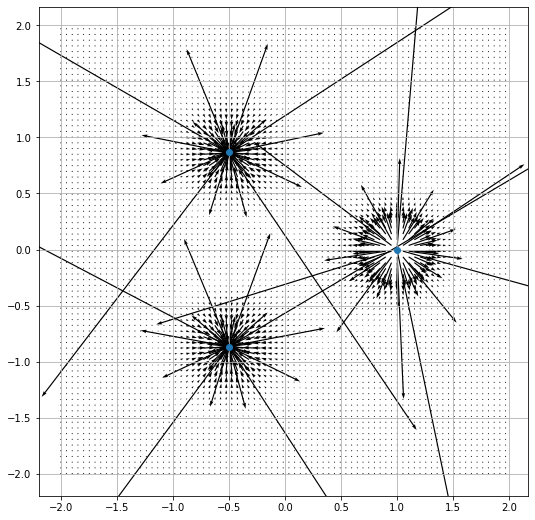

In [9]:
fig, ax  = plt.subplots(figsize=(9,9))
xs = [ field[0][0] for field in fields ]; ys = [ field[0][1] for field in fields]
ax.quiver(axis[0], axis[1], Ex, Ey)
ax.grid()
ax.set_aspect('equal')
ax.plot(xs, ys, 'o')
plt.show()

### El potencial

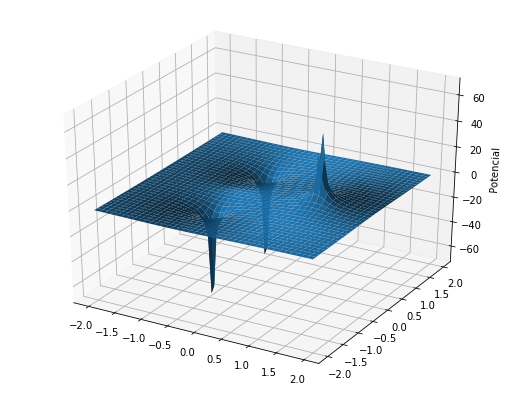

In [10]:
potential = get_potential(fields, axis, k)
fig, ax  = plt.subplots(figsize=(9,7))
ax = plt.subplot(projection='3d')
ax.set(zlabel='Potencial', zlim=(-70, 70))
surf = ax.plot_surface(axis[0], axis[1], potential)
plt.show()

### Líneas equipotenciales

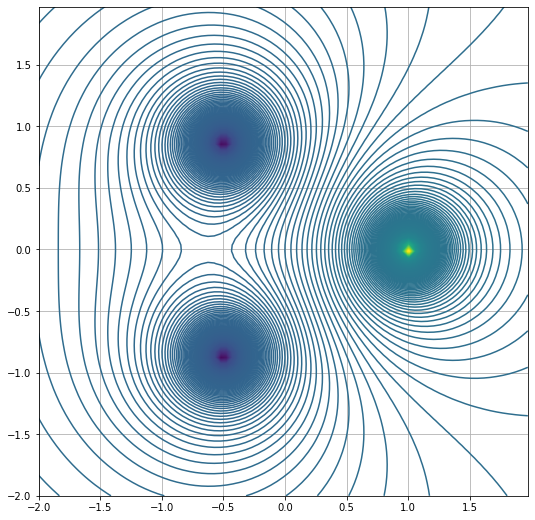

In [11]:
fig, ax  = plt.subplots(figsize=(9,9))
ax.contour(axis[0],axis[1],potential,get_potential_level(potential,  1000))
ax.set_aspect('equal')
ax.grid()
plt.show()

## Encuentre para 6 cargas ubicadas en un hex´agono regular de lado a = 1

In [12]:
fields = generate_electromagnetism_fields(6, 1,  -2, 2, values=[4.0, -2.0, 1.5, -3.0, 2.0,-1.5])
#fields = generate_electromagnetism_fields(6, 1,  -200, 200)

k = 1
h = 0.0509
axis = np.meshgrid(np.arange(-2, 2, h), np.arange(-2, 2, h))
Ex = electromagnetism_in_axis_(fields, axis, k, 0)
Ey = electromagnetism_in_axis_(fields, axis, k, 1)
for field in fields:
    print ("Campo gravitatorio generado en ({:.2}, {:.2}) con una fuerza de: {:.2}".format(field[0][0], field[0][1], field[1]))

Campo gravitatorio generado en (1.0, 0.0) con una fuerza de: 4.0
Campo gravitatorio generado en (0.5, 0.87) con una fuerza de: -2.0
Campo gravitatorio generado en (-0.5, 0.87) con una fuerza de: 1.5
Campo gravitatorio generado en (-1.0, 1.2e-16) con una fuerza de: -3.0
Campo gravitatorio generado en (-0.5, -0.87) con una fuerza de: 2.0
Campo gravitatorio generado en (0.5, -0.87) con una fuerza de: -1.5


### Campo eléctrico

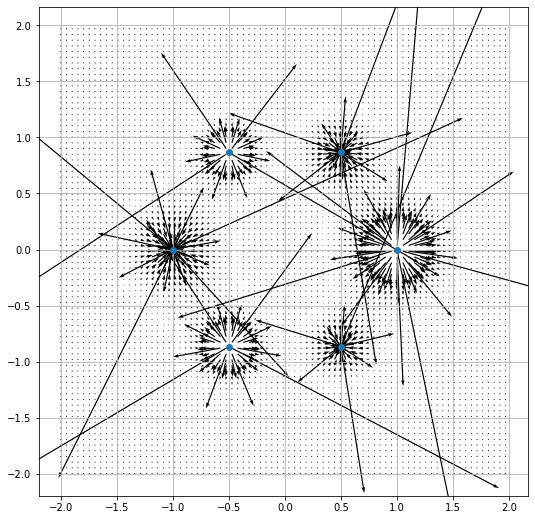

In [13]:
fig, ax  = plt.subplots(figsize=(9,9))
xs = [ field[0][0] for field in fields ]; ys = [ field[0][1] for field in fields]
ax.quiver(axis[0], axis[1], Ex, Ey)
ax.grid()
ax.set_aspect('equal')
ax.plot(xs, ys, 'o')
plt.show()

### El potencial

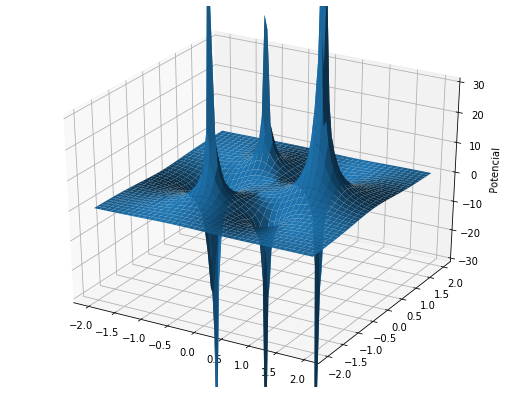

In [14]:
potential = get_potential(fields, axis, k)

fig, ax  = plt.subplots(figsize=(9,7))
ax = plt.subplot(111, projection='3d', facecolor='white')
ax.set(zlabel='Potencial', zlim=(-30 , 30))
surf = ax.plot_surface(axis[0], axis[1], potential)
plt.show()

### Líneas equipotenciales

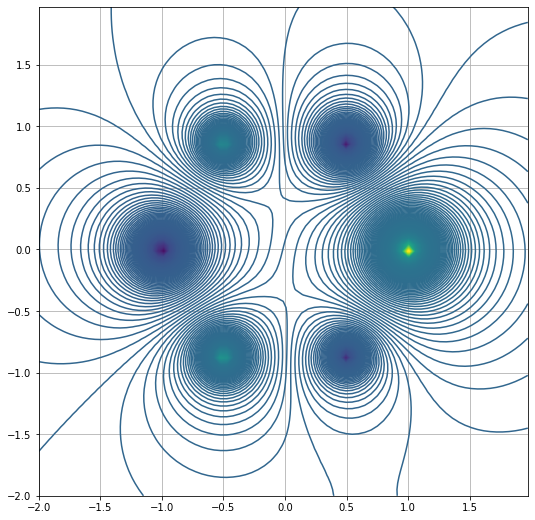

In [15]:
fig, ax  = plt.subplots(figsize=(9,9))
ax.contour(axis[0],axis[1],potential,get_potential_level(potential,  1000))
ax.set_aspect('equal')
ax.grid()
plt.show()

## Encuentre para 5 cargas ubicadas en un una recta de lado a = 1

In [16]:
#field_charges = [ 10 , 10 , 10 , 10 , 10, 10 , 10 , 10 , 10 , 10]
field_charges = [ 0.5 for i in range(0,5) ]
fields = []
for i , field_charge in enumerate(field_charges):
    fields.append([ np.array([i*2, 0]), field_charge  ])
#fields = generate_electromagnetism_fields(6, 1,  -2, 2, values=[4.0, -2.0, 1.5, -3.0, 2.0,-1.5])
#fields = generate_electromagnetism_fields(6, 1,  -200, 200)

k = 1
h = 0.125
axis = np.meshgrid(np.arange(-2, 10, h), np.arange(-6, 6, h))
Ex = electromagnetism_in_axis_(fields, axis, k, 0)
Ey = electromagnetism_in_axis_(fields, axis, k, 1)


### Campo eléctrico

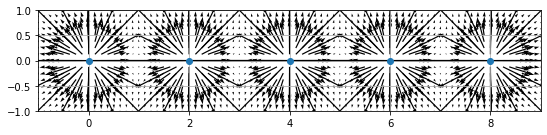

In [17]:
fig, ax  = plt.subplots(figsize=(9,3))
xs = [ field[0][0] for field in fields ]; ys = [ field[0][1] for field in fields]
ax.quiver(axis[0], axis[1], Ex, Ey)
ax.grid()
ax.set_aspect('equal')
ax.plot(xs, ys, 'o')
ax.set(ylim=(-1, 1), xlim=(-1, 9))
plt.show()

### El potencial

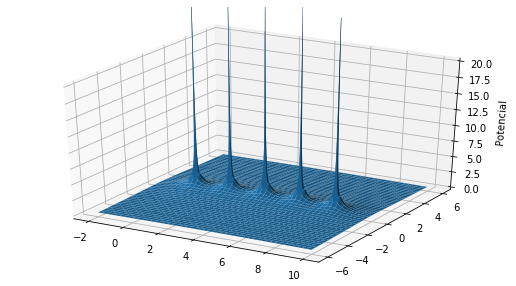

In [18]:
k = 1
h = 0.016625
axis = np.meshgrid(np.arange(-2, 10, h), np.arange(-6, 6, h))
Ex = electromagnetism_in_axis_(fields, axis, k, 0)
Ey = electromagnetism_in_axis_(fields, axis, k, 1)

potential = get_potential(fields, axis, k)

fig, ax  = plt.subplots(figsize=(9,5))
ax = plt.subplot(111, projection='3d', facecolor='white')
ax.set(zlabel='Potencial', zlim =(0, 20))
surf = ax.plot_surface(axis[0], axis[1], potential)
plt.show()

### Líneas equipotenciales

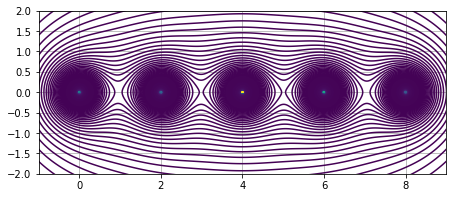

In [19]:
fig, ax  = plt.subplots(figsize=(9,3))
ax.contour(axis[0],axis[1],potential,get_potential_level(potential,  4800))
ax.set_aspect('equal')
ax.set(xlim=(-1, 9), ylim=(-2, 2))
ax.grid()
plt.show()